In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from tqdm import tqdm

In [ ]:
import tensorflow as tf

In [ ]:
# !wget -q https://github.com/piyush-cosmo/W-B-Report/releases/download/v2.0/BBC.News.Train.csv

In [ ]:
# corpus_df = pd.read_csv('/content/BBC.News.Train.csv')
# corpus_df = corpus_df.drop(columns=['ArticleId'])

In [ ]:
# corpus_df.head()

In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
# len(corpus_df['Text'])

In [ ]:
# mod_df = corpus_df
# mod_df.head()

In [ ]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'A kings breakfast has sausages, ham, bacon, eggs, toast and beans.',
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!',
          'The dog is loyal to its master.',
          'This dog look likes a fox.',
          'The pasta looks delicious.',
          'The weather is great today.',
          'My friend is having a burger.',
          'I hate eating new dishes.',
          'This kitten is looking so cute.',
          'I love playing football.',
          'Magnus Carlsen is the best chess player in the world.',
          'Sachin Tendulkar is the God of cricket.',
          'Winter is coming.',
          'The eggs are boiled.',
          'The national sports of India is hockey.',
          'An apple a day keeps a doctor away.',
          'The day seems so humid.',
          'The squirrel looks cute but is dangerous when encountered.',
          'Our college has no tennis court.',
          'My favourite dish is biryani.',
          'Lion is the king of the jungle.',
          'Let us all play together.',
          'Off the 28 Olympic medals, India have won 9 gold, 7 silver and 12 bronze.',
          'The aroma of the dish is spreading all around the gallery.'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals', 'animals', 'animals', 'food', 'weather', 'food', 'food', 'animals',
          'sports', 'sports', 'sports', 'weather', 'food', 'sports', 'food', 'weather', 'animals', 'sports', 'food', 'animals', 'sports', 'sports', 'food']
           
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Text': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Text', 'Category']]
corpus_df

,Text,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A kings breakfast has sausages, ham, bacon, eg...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals
8,The dog is loyal to its master.,animals
9,This dog look likes a fox.,animals


In [ ]:
mod_df = corpus_df

In [ ]:
for i in range(len(corpus_df['Text'])):
  new_sent = ''
  for j in corpus_df['Text'].iloc[i].split():
    if j not in stop_words:
      new_sent = new_sent + ' ' + j
  mod_df['Text'].iloc[i] = new_sent   

In [ ]:
mod_df

,Text,Category
0,The sky blue beautiful.,weather
1,Love blue beautiful sky!,weather
2,The quick brown fox jumps lazy dog.,animals
3,"A kings breakfast sausages, ham, bacon, eggs,...",food
4,"I love green eggs, ham, sausages bacon!",food
5,The brown fox quick blue dog lazy!,animals
6,The sky blue sky beautiful today,weather
7,The dog lazy brown fox quick!,animals
8,The dog loyal master.,animals
9,This dog look likes fox.,animals


In [ ]:
top_k = 1000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')

In [ ]:
tokenizer.fit_on_texts(mod_df['Text'])
tokenizer.fit_on_texts(corpus_df['Category'])

In [ ]:
def check_vocab(word):
    i = tokenizer.word_index[word]
    print(f"The index of the word: {i}")
    print(f"Index {i} is word {tokenizer.index_word[i]}")
    
check_vocab("beans")

The index of the word: 34
Index 34 is word beans


In [ ]:
train_seqs = tokenizer.texts_to_sequences(mod_df['Text'])
train_labels = tokenizer.texts_to_sequences(corpus_df['Category'])

In [ ]:
train_seqs

[[2, 8, 9, 11],
 [12, 9, 11, 8],
 [2, 13, 14, 10, 29, 15, 7],
 [30, 31, 32, 18, 19, 20, 16, 33, 34],
 [17, 12, 35, 16, 19, 18, 20],
 [2, 14, 10, 13, 9, 7, 15],
 [2, 8, 9, 8, 11, 21],
 [2, 7, 15, 14, 10, 13],
 [2, 7, 36, 37],
 [22, 7, 38, 39, 10],
 [2, 40, 23, 41],
 [2, 6, 42, 21],
 [24, 43, 44],
 [17, 45, 46, 47, 48],
 [22, 49, 50, 25],
 [17, 12, 51, 52],
 [53, 54, 55, 56, 57, 58],
 [59, 60, 61, 62],
 [63, 64],
 [2, 16, 65],
 [2, 66, 4, 26, 67],
 [68, 69, 27, 70, 71, 72],
 [2, 27, 73, 74],
 [2, 75, 23, 25, 76, 77],
 [78, 79, 80, 81],
 [24, 82, 28, 83],
 [84, 85, 86],
 [87, 88, 89, 90],
 [91, 92, 93, 94, 26, 95, 96, 97, 98, 99, 100],
 [2, 101, 28, 102, 103, 104]]

In [ ]:
EMBEDDING_SIZE = 2
opt = tf.optimizers.Adam()
iterations = 1000
# Here the word vectors are represented as row
embedding_matrix =  tf.Variable(np.random.rand(len(tokenizer.word_index), EMBEDDING_SIZE))
de_embedding_matrix = tf.Variable(np.random.rand(EMBEDDING_SIZE, len(tokenizer.word_index)))

In [ ]:
def one_hot_enc(inp):
  dummy_vector = np.zeros(shape=(1, len(tokenizer.word_index)))
  dummy_vector[0][inp-1] = 1
  return dummy_vector

In [ ]:
def train_step(indices, target ,log_list):
  
  target = target[0]
  with tf.GradientTape() as tape:
    
    hidden_avg = 0
    for i in indices:
      hidden_avg = hidden_avg + tf.matmul(one_hot_enc(i),embedding_matrix)
    hidden_avg = tf.divide(hidden_avg,len(indices))  

    output_over_classes = tf.matmul(hidden_avg, de_embedding_matrix)
    soft_out = tf.nn.softmax(tf.squeeze(output_over_classes), axis=0)
    loss_trgt = soft_out[target-1]
    log_loss = -tf.math.log(loss_trgt)
    log_loss = (1/len(indices))*(target-1)*log_loss
    log_list.append(log_loss.numpy())


  grad = tape.gradient(log_loss, [embedding_matrix, de_embedding_matrix])
  opt.apply_gradients(zip(grad, [embedding_matrix, de_embedding_matrix]))

In [ ]:
log_list = []

In [ ]:
for iter in tqdm(range(iterations)):

  for idxs,trgt in zip(train_seqs, train_labels): 
    train_step(idxs, trgt, log_list)

100%|██████████| 1000/1000 [02:10<00:00,  7.65it/s]


In [ ]:
import matplotlib.pyplot as plt

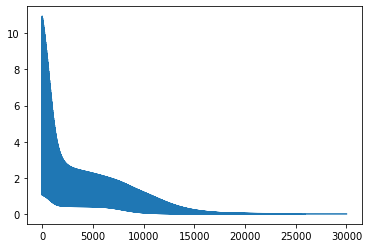

In [ ]:
plt.plot(log_list)

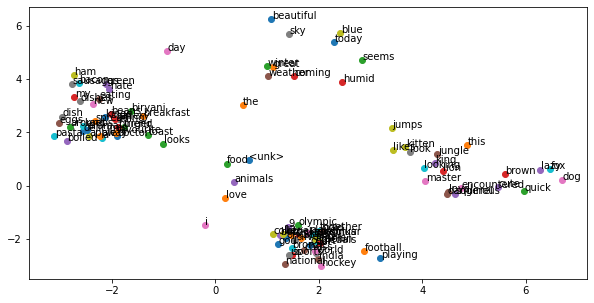

In [ ]:
embedding_matrix.numpy().shape
fig = plt.figure(figsize=(10,5))
count = 0
for i,j in embedding_matrix.numpy():
  plt.scatter(i,j)
  plt.text( i+0.01, j+0.01, tokenizer.index_word[count+1])
  count += 1
   
plt.show()